In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/climate_change_agriculture_dataset.csv')
data.head()

,Temperature,Precipitation,CO2 Levels,Crop Yield,Soil Health,Extreme Weather Events,Crop Disease Incidence,Water Availability,Food Security,Economic Impact
0,7,59,329,483,10,Drought,Low,High,Low,High
1,39,20,426,679,8,Heatwave,High,Low,High,Low
2,18,46,403,587,5,Flood,Low,Medium,Low,Medium
3,9,91,356,220,5,Heatwave,Medium,Medium,High,Medium
4,35,12,325,538,1,Storm,Medium,Medium,High,High


In [3]:
data.isna().sum()

,0
Temperature,0
Precipitation,0
CO2 Levels,0
Crop Yield,0
Soil Health,0
Extreme Weather Events,0
Crop Disease Incidence,0
Water Availability,0
Food Security,0
Economic Impact,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Temperature             1000 non-null   int64 
 1   Precipitation           1000 non-null   int64 
 2   CO2 Levels              1000 non-null   int64 
 3   Crop Yield              1000 non-null   int64 
 4   Soil Health             1000 non-null   int64 
 5   Extreme Weather Events  1000 non-null   object
 6   Crop Disease Incidence  1000 non-null   object
 7   Water Availability      1000 non-null   object
 8   Food Security           1000 non-null   object
 9   Economic Impact         1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [7]:
#encode the categorical columns into numerical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Extreme Weather Events']=le.fit_transform(data['Extreme Weather Events'])
data['Crop Disease Incidence']=le.fit_transform(data['Crop Disease Incidence'])
data['Water Availability']=le.fit_transform(data['Water Availability'])
data['Economic Impact']=le.fit_transform(data['Economic Impact'])
data['Food Security']=le.fit_transform(data['Food Security'])


In [8]:
data.head()

,Temperature,Precipitation,CO2 Levels,Crop Yield,Soil Health,Extreme Weather Events,Crop Disease Incidence,Water Availability,Food Security,Economic Impact
0,7,59,329,483,10,0,1,0,1,0
1,39,20,426,679,8,2,0,1,0,1
2,18,46,403,587,5,1,1,2,1,2
3,9,91,356,220,5,2,2,2,0,2
4,35,12,325,538,1,3,2,2,0,0


In [20]:
X = data[['Crop Yield', 'CO2 Levels', 'Precipitation', 'Temperature', 'Soil Health']]  # Features
y = data['Food Security']

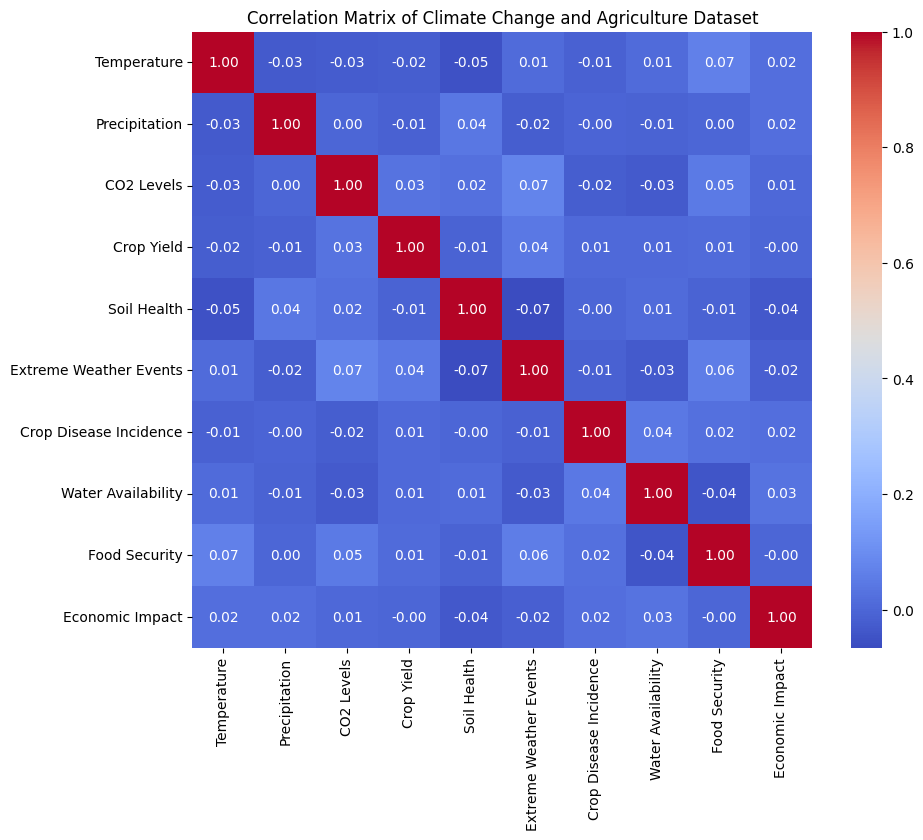

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'data'
correlation_matrix = data.corr()

# Plotting the correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Climate Change and Agriculture Dataset')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [24]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC()
}

accuracy_scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores[model_name] = accuracy_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


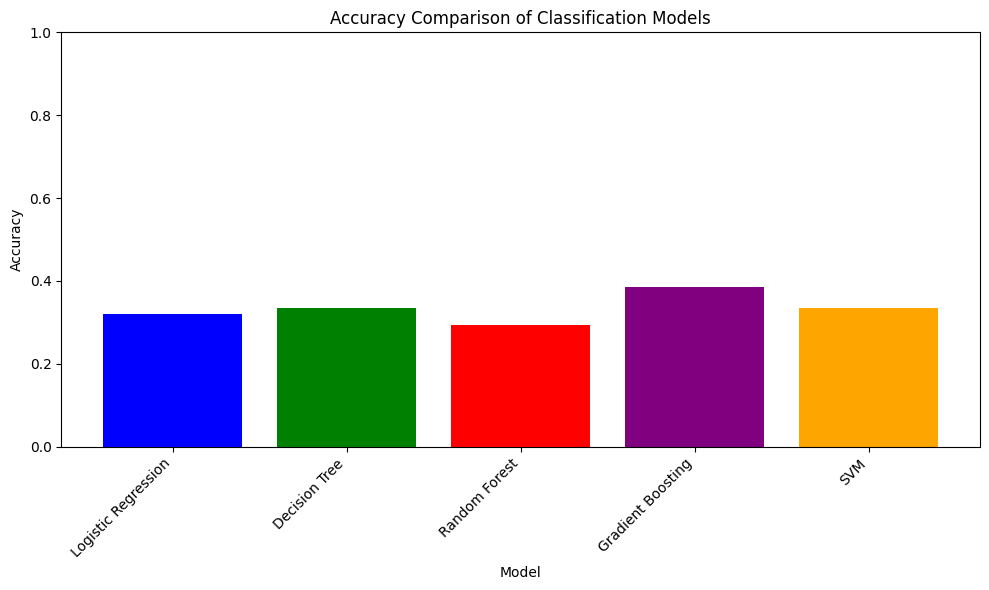

In [25]:
model_names = list(accuracy_scores.keys())
accuracy_values = list(accuracy_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Accuracy Comparison of Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)  # Set y-axis limits for better visualization
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# Assuming you have your data in X (features) and y (target)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for SVM and KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Experiment with Different Models ---

# Support Vector Machines (SVM)
svm_classifier = SVC()
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid_search = GridSearchCV(svm_classifier, svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)
svm_best_model = svm_grid_search.best_estimator_
svm_predictions = svm_best_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")

# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [3, 5, 7], 'metric': ['euclidean', 'manhattan']}
knn_grid_search = GridSearchCV(knn_classifier, knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)
knn_best_model = knn_grid_search.best_estimator_
knn_predictions = knn_best_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy}")

# Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy}")

# --- Address Class Imbalance (if applicable) ---

# Check for class imbalance (e.g., using value_counts on y_train)
# If imbalance is present, apply SMOTE
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Retrain models using resampled data if necessary
# ...

SVM Accuracy: 0.34
KNN Accuracy: 0.305
Naive Bayes Accuracy: 0.305


In [31]:
import pandas as pd

# Assuming your target variable is in a pandas Series called 'y'
class_counts = pd.value_counts(y)
print(class_counts)

Food Security
0    350
2    334
1    316
Name: count, dtype: int64


<ipython-input-31-93dd6b573033>:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  class_counts = pd.value_counts(y)


In [32]:
# Assume your original dataframe is called data
# ... Your code ...

smote = SMOTE(random_state=42)  # Initialize SMOTE

# fit_resample directly with dataframe to maintain feature names
data_resampled, y_resampled = smote.fit_resample(data.drop('Food Security', axis=1), data['Food Security'])

# If you want to put it back into a dataframe
X_resampled = pd.DataFrame(data_resampled, columns=data.drop('Food Security', axis=1).columns)

# Now use X_resampled and y_resampled for model training

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [33]:
import pandas as pd

# Assuming you have your resampled target variable in 'y_resampled'
class_counts_resampled = pd.value_counts(y_resampled)
print(class_counts_resampled)

Food Security
1    350
0    350
2    350
Name: count, dtype: int64


<ipython-input-33-dffbc1a6ed4e>:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  class_counts_resampled = pd.value_counts(y_resampled)


In [35]:
model = LogisticRegression(max_iter=1000)  # Increase max_iter to a higher value

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
model = LogisticRegression(solver='liblinear')  # Try a different solver

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
# Assuming you have your resampled data in X_resampled (DataFrame) and y_resampled (Series or array)

# 1. Scale the data:
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled) # Assuming X_resampled is a pandas DataFrame or a NumPy array


# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 3. Model training (using Logistic Regression as an example)
model = LogisticRegression(max_iter=1000)  # Increase max_iter
model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

# 6. Hyperparameter tuning (using GridSearchCV as an example)
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_  # Get the best model
best_params = grid_search.best_params_  # Get the best hyperparameters

print(f"Best Hyperparameters: {best_params}")

# 7. Evaluate the best model
y_pred_best = best_model.predict(X_test)
# ... (Calculate and print evaluation metrics for the best model - same as step 5)

Accuracy: 0.3142857142857143
Precision: 0.3210108604845447
Recall: 0.3142857142857143
F1-Score: 0.3137237415919733
Confusion Matrix:
[[26 19 25]
 [26 20 31]
 [26 17 20]]
Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [41]:
#convert the above model to pickle file
import pickle

# Assuming 'best_model' is your trained model (from the previous code)

# Save the model to a pickle file
filename = 'trained_model.pkl'  # Choose a filename for your pickle file
pickle.dump(best_model, open(filename, 'wb'))


In [42]:
from google.colab import files

# Assuming your pickle file is named 'trained_model.pkl'
files.download('trained_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>